<a href="https://colab.research.google.com/github/rajanpawar90/TensorFlow-in-Practice-Deeplearning.ai-/blob/master/SummaryCode/Course3_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install TensorFlow 2 version




In [1]:
 #Install the latest version of tensorflow
 !pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


#Goals
1. Tokenization of that text- This is the process of converting the text into numeric values, with a number representing a word or a character. You will use Tokenizer and pad_sequences APIs in TensorFlow and how they can be used to prepare and encode text and sentences to get them ready for training neural networks!
2. Using Embedding, tokens are mapped as vectors in a high dimension space. With Embeddings and labelled examples, these vectors can then be tuned so that words with similar meaning will have a similar direction in the vector space. This will begin the process of training a neural network to udnerstand sentiment in text -- and you'll begin by looking at movie reviews, training a neural network on texts that are labelled 'positive' or 'negative' and determining which words in a sentence drive those meanings.
3. In the last couple of weeks you looked first at Tokenizing words to get numeric values from them, and then using Embeddings to group words of similar meaning depending on how they were labelled. This gave you a good, but rough, sentiment analysis -- words such as 'fun' and 'entertaining' might show up in a positive movie review, and 'boring' and 'dull' might show up in a negative one. But sentiment can also be determined by the sequence in which words appear. For example, you could have 'not fun', which of course is the opposite of 'fun'. This week you'll start digging into a variety of model formats that are used in training models to understand context in sequence!
4. Taking everything that you've learned in training a neural network based on NLP, we thought it might be a bit of fun to turn the tables away from classification and use your knowledge for prediction. Given a body of words, you could conceivably predict the word most likely to follow a given word or phrase, and once you've done that, to do it again, and again. With that in mind, this week you'll build a poetry generator. It's trained with the lyrics from traditional Irish songs, and can be used to produce beautiful-sounding verse of it's own!


In [2]:
import tensorflow as tf
print("tensorflow version is",tf.__version__)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tensorflow version is 2.0.0


IMDB dataset: Load using tfds.load
BBC dataset: Load using csv.reader function, use of stopwords
sarcasm dataset: json.load, split data,  
Text classification
Word predictions

In [3]:
#BBC dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

#Sarcasm dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

#IMDB dataset
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

--2019-12-30 01:17:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  6.40MB/s    in 0.8s    

2019-12-30 01:17:16 (6.40 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]

--2019-12-30 01:17:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarca

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
#Function for creating train and test datasets
def generate_train_test_datasets(sentences, labels, split_ratio):
  training_size = int(len(sentences) * split_ratio)
  training_sentences = sentences[:training_size]
  training_labels = labels[:training_size]
  testing_sentneces = sentences[training_size:]
  testing_labels = labels[training_size:]
  return training_sentences, training_labels, testing_sentneces, testing_labels


In [0]:
#Function for getting tokenized training and test data for inputing it in the model
def getTokenizedData(training_sentences, testing_sentences):
  vocab_size = 1000
  embedding_dim = 100
  max_length = 120
  trunc_type='post'
  padding_type='post'
  oov_tok = "<OOV>"
  training_portion = .8

  tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
  tokenizer.fit_on_texts(training_sentences)
  word_index = tokenizer.word_index

  training_sequences = tokenizer.texts_to_sequences(training_sentences)
  training_padded = pad_sequences(training_sentences, padding=padding_type, maxlen= max_length)

  testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
  testing_padded = pad_sequences(testing_sequences, padding=padding_type, maxlen=max_length) 

  return training_padded, testing_padded




In [98]:
#Generate train and test data fort IMDB dataset
imdb_train, imdb_test = imdb['train'], imdb['test']

imdb_training_sentences = []
imdb_training_labels = []
imdb_testing_sentences = []
imdb_testing_labels = []

for s,l in imdb_train:
  imdb_training_sentences.append(str(s.numpy()))
  imdb_training_labels.append(l.numpy())

for s,l in imdb_test:
  imdb_testing_sentences.append(str(s.numpy()))
  imdb_testing_labels.append(l.numpy())

print(imdb_training_sentences[1],"\n", imdb_training_labels[4])

imdb_training_labels = np.array(imdb_training_labels)
imdb_testing_labels = np.array(imdb_testing_labels)

#imdb_training_tokenized , imdb_testing_tokenized= getTokenizedData(imdb_training_sentences, imdb_testing_sentences)            Created invalid literal for int() with base10 error

vocab_size = 10000
embedding_dim = 100
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(imdb_training_sentences)
word_index = tokenizer.word_index

imdb_training_sequences = tokenizer.texts_to_sequences(imdb_training_sentences)
imdb_training_padded = pad_sequences(imdb_training_sequences,maxlen=max_length, truncating=trunc_type)

imdb_testing_sequences = tokenizer.texts_to_sequences(imdb_testing_sentences)
imdb_testing_padded = pad_sequences(imdb_testing_sequences,maxlen=max_length)

b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i'm sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It's a must see and i hope u share my interests" 
 1


In [99]:
#Generate train and test data for BBC datasets
bbc_sentences = []
bbc_labels = []
#stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

with open("/tmp/bbc-text.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader) #to ignore the header
  for row in reader:
    bbc_labels.append(row[0])
    sentence = row[1]
    #for word in stopwords:
    #  token = " "+ word + " "
    #  sentence = sentence.replace(token, " ")
    bbc_sentences.append(sentence)
print(len(bbc_labels))
print(len(bbc_sentences))
print(bbc_sentences[0])  

training_size = int(len(bbc_sentences) * 0.8)
bbc_training_sentences = []
bbc_training_labels = []
bbc_testing_sentences = []
bbc_testing_labels = []

bbc_training_sentences, bbc_training_labels, bbc_testing_sentences, bbc_testing_labels = generate_train_test_datasets(bbc_sentences, bbc_labels, split_ratio=0.8)
print("\n", bbc_training_sentences[9], "\n", bbc_testing_labels[90])

bbc_tokenized_train = []
bbc_tokenized_test = []

#bbc_tokenized_train, bbc_tokenized_test = getTokenizedData(bbc_training_sentences, bbc_testing_sentences)       Created invalid literal for int() with base10 error

vocab_size = 10000
embedding_dim = 100
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(bbc_training_sentences)
word_index = tokenizer.word_index

bbc_training_sequences = tokenizer.texts_to_sequences(bbc_training_sentences)
bbc_training_padded = pad_sequences(bbc_training_sequences,maxlen=max_length, truncating=trunc_type)

bbc_testing_sequences = tokenizer.texts_to_sequences(bbc_testing_sentences)
bbc_testing_padded = pad_sequences(bbc_testing_sequences,maxlen=max_length)


label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(bbc_labels)

bbc_training_labels = np.array(label_tokenizer.texts_to_sequences(bbc_training_labels))
bbc_testing_labels = np.array(label_tokenizer.texts_to_sequences(bbc_testing_labels))

#Final processed datasets for training and testing
bbc_training_padded = np.array(bbc_training_padded)
bbc_training_labels = np.array(bbc_training_labels)
bbc_testing_padded = np.array(bbc_testing_padded)
bbc_testing_labels = np.array(bbc_testing_labels)

2225
2225
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-i

In [100]:
#Download and gerate train, test data for sarcasm datasets

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

import json
with open('/tmp/sarcasm.json', 'r') as f:
  sarcasm_datastore = json.load(f)

sarcasm_sentences = []
sarcasm_labels = []
for item in sarcasm_datastore:
  sarcasm_sentences.append(item['headline'])
  sarcasm_labels.append(item['is_sarcastic'])

print(sarcasm_sentences[1], "\n", sarcasm_labels[1])

training_size = int(len(sarcasm_sentences) * 0.8)
sarcasm_training_sentences = sarcasm_sentences[:training_size]
sarcasm_training_labels = sarcasm_labels[:training_size]
sarcasm_testing_sentences = sarcasm_sentences[training_size:]
sarcasm_testing_labels = sarcasm_labels[training_size:]
#sarcasm_training_sentences, sarcasm_training_labels, sarcasm_testing_sentences, sarcasm_testing_labels = generate_train_test_datasets(sarcasm_sentences, sarcasm_labels, split_ratio=0.8)
#print("\n", sarcasm_training_labels[9], "\n", sarcasm_testing_labels[90])

#tokening the training and testing sentences without using getTokenizedData 
vocab_size = 10000
embedding_dim = 100
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sarcasm_training_sentences)
word_index = tokenizer.word_index

sarcasm_training_sequences = tokenizer.texts_to_sequences(sarcasm_training_sentences)
sarcasm_training_padded = pad_sequences(sarcasm_training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

sarcasm_testing_sequences = tokenizer.texts_to_sequences(sarcasm_testing_sentences)
sarcasm_testing_padded = pad_sequences(sarcasm_testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Final processed datasets for training and testing
sarcasm_training_padded = np.array(sarcasm_training_padded)
sarcasm_training_labels = np.array(sarcasm_training_labels)
sarcasm_testing_padded = np.array(sarcasm_testing_padded)
sarcasm_testing_labels = np.array(sarcasm_testing_labels)

--2019-12-30 05:01:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2019-12-30 05:01:39 (196 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]

the 'roseanne' revival catches up to our thorny political mood, for better and worse 
 0


In [101]:
#Run various models and their plots
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

vocab_size = 10000 
embedding_dim = 100
max_length = 120

def plotModel(history):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'r')
  plt.plot(epochs, val_acc, 'b')
  plt.title('Training and validation accuracy')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["Accuracy", "Validation Accuracy"])

  plt.figure()

  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'r')
  plt.plot(epochs, val_loss, 'b')
  plt.title('Training and validation loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(["Loss", "Validation Loss"])

  plt.figure()


# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
#Detailed assignment - https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/NLP%20Course%20-%20Week%203%20Exercise%20Answer.ipynb#scrollTo=ohOGz24lsNAD
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
glove_vocab_size = 138858      #vocab size of the downloaded corpus data
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((glove_vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;




--2019-12-30 05:01:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  51.4MB/s    in 6.4s    

2019-12-30 05:01:50 (51.4 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [0]:
#Simple Embedding layer
def runSimpleModel(training_data, training_labels, testing_data, testing_labels, epochs):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print("Summary of runSimpleModel \n")
  model.summary()
  num_epochs = epochs
  history = model.fit(training_data, training_labels, epochs=num_epochs, validation_data=(testing_data, testing_labels), verbose=2)
  plotModel(history)

#Model with bidrectional LSTM layer
def runBiLSTMModel(training_data, training_labels, testing_data, testing_labels, epochs):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
  ])

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print("Summary of runBiLSTMModel \n")
  model.summary()
  num_epochs = epochs
  history = model.fit(training_data, training_labels, epochs=num_epochs, validation_data=(testing_data, testing_labels), verbose=2)
  plotModel(history)

#Model that uses glove embeddings unpacked previously in the Embedding layer. This is an example of transfer learning 
def runGloveEmbeddingModel(training_data, training_labels, testing_data, testing_labels, epochs):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(glove_vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print("Summary of runGloveEmbeddingModel \n")
  model.summary()
  num_epochs = epochs
  history = model.fit(training_data, training_labels, epochs=num_epochs, validation_data=(testing_data, testing_labels), verbose=2)
  plotModel(history)

#Model classifies into six categories. 
def runBccDataClassification(training_data, training_labels, testing_data, testing_labels, epochs):
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      #tf.keras.layers.Embedding(glove_vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),   #Transfer learning seems to reduce the accuracy
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv1D(64, 5, activation='relu'),
      tf.keras.layers.MaxPooling1D(pool_size=4),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  print("Summary of runBccDataClassification \n")
  model.summary()
  num_epochs = epochs
  history = model.fit(training_data, training_labels, epochs=num_epochs, validation_data=(testing_data, testing_labels), verbose=2)

# Model Definition with Conv1D layer
def con1DModel(training_data, training_labels, testing_data, testing_labels, epochs):
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.Conv1D(128, 5, activation='relu'),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(6, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print("Summary of con1DModel \n")
  model.summary()
  num_epochs = epochs
  history = model.fit(training_data, training_labels, epochs=num_epochs, validation_data=(testing_data, testing_labels), verbose=2)
  plotModel(history)




Summary of runSimpleModel 

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_59 (Embedding)     (None, 120, 100)          1000000   
_________________________________________________________________
flatten_30 (Flatten)         (None, 12000)             0         
_________________________________________________________________
dense_114 (Dense)            (None, 6)                 72006     
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 7         
Total params: 1,072,013
Trainable params: 1,072,013
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 - 15s - loss: 0.4558 - accuracy: 0.7712 - val_loss: 0.3827 - val_accuracy: 0.8288
Epoch 2/3
25000/25000 - 15s - loss: 0.1185 - accuracy: 0.96

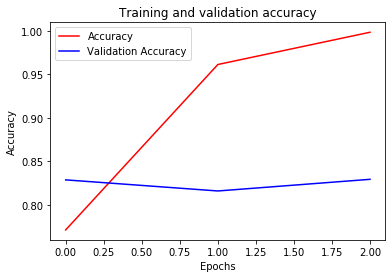

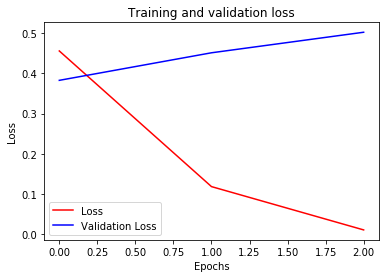

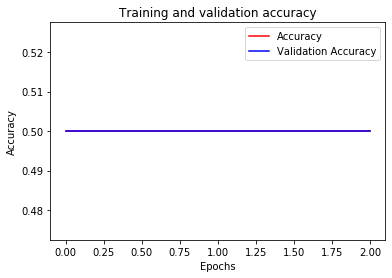

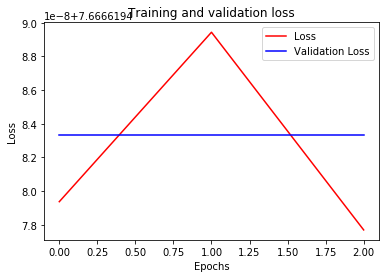

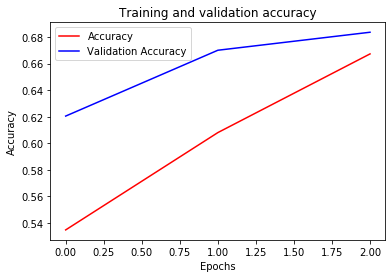

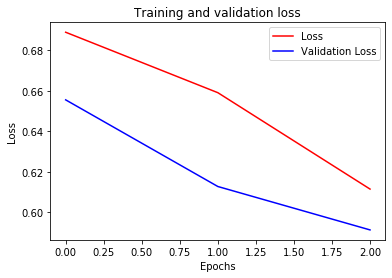

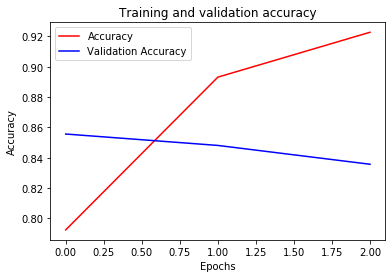

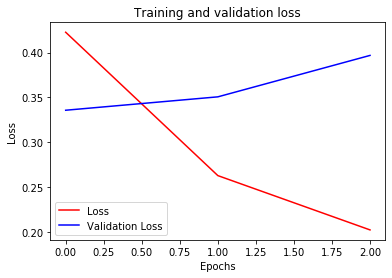

<Figure size 432x288 with 0 Axes>

In [103]:
#Run above models on imdb dataset to classify review into positive and negative
runSimpleModel(imdb_training_padded, imdb_training_labels, imdb_testing_padded, imdb_testing_labels, epochs=3)    
runBiLSTMModel(imdb_training_padded, imdb_training_labels, imdb_testing_padded, imdb_testing_labels, epochs=3)
runGloveEmbeddingModel(imdb_training_padded, imdb_training_labels, imdb_testing_padded, imdb_testing_labels, epochs=3)
con1DModel(imdb_training_padded, imdb_training_labels, imdb_testing_padded, imdb_testing_labels, epochs=3)

Summary of runBiLSTMModel 

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_63 (Embedding)     (None, 120, 100)          1000000   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                34048     
_________________________________________________________________
dense_121 (Dense)            (None, 24)                1560      
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 25        
Total params: 1,035,633
Trainable params: 1,035,633
Non-trainable params: 0
_________________________________________________________________
Train on 21367 samples, validate on 5342 samples
Epoch 1/3
21367/21367 - 84s - loss: 8.5762 - accuracy: 0.4407 - val_loss: 8.7085 - val_accuracy: 0.4320
Epoch 2/3
21367/21367 - 80s - loss: 8.5762 - accuracy: 0.440

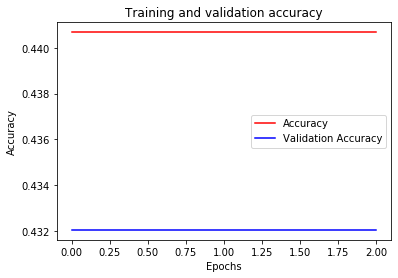

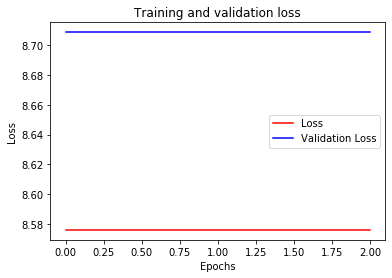

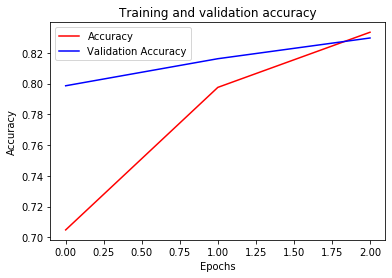

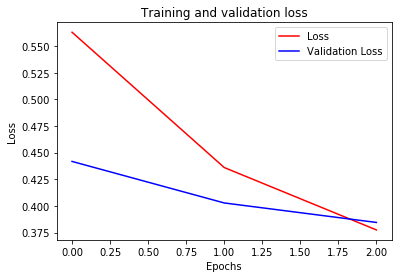

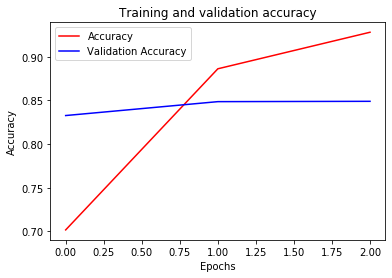

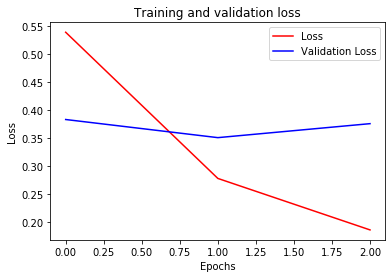

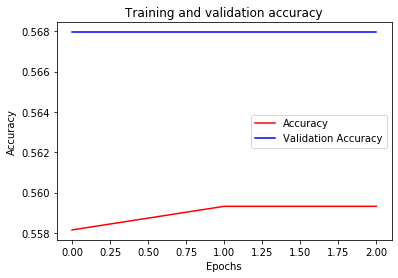

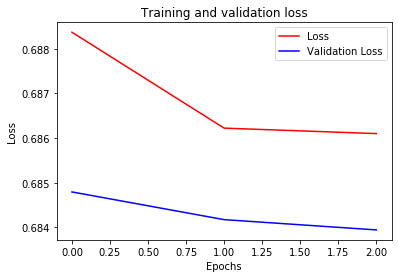

<Figure size 432x288 with 0 Axes>

In [104]:
#Run above models on sarcasm dataset to classify review into positive and negative
runBiLSTMModel(sarcasm_training_padded, sarcasm_training_labels, sarcasm_testing_padded, sarcasm_testing_labels, epochs=3)
runGloveEmbeddingModel(sarcasm_training_padded, sarcasm_training_labels, sarcasm_testing_padded, sarcasm_testing_labels, epochs=3)
con1DModel(sarcasm_training_padded, sarcasm_training_labels, sarcasm_testing_padded, sarcasm_testing_labels, epochs=3)
runSimpleModel(sarcasm_training_padded, sarcasm_training_labels, sarcasm_testing_padded, sarcasm_testing_labels, epochs=3)

Summary of runSimpleModel 

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_67 (Embedding)     (None, 120, 100)          1000000   
_________________________________________________________________
flatten_32 (Flatten)         (None, 12000)             0         
_________________________________________________________________
dense_128 (Dense)            (None, 6)                 72006     
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 7         
Total params: 1,072,013
Trainable params: 1,072,013
Non-trainable params: 0
_________________________________________________________________
Train on 1780 samples, validate on 445 samples
Epoch 1/3
1780/1780 - 2s - loss: -7.5999e+00 - accuracy: 0.2191 - val_loss: -3.5525e+01 - val_accuracy: 0.2270
Epoch 2/3
1780/1780 - 1s - loss: -1.4866e+02 - accuracy

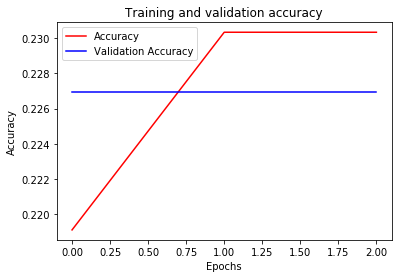

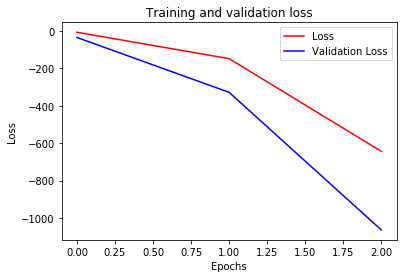

<Figure size 432x288 with 0 Axes>

In [105]:
#Run runBccDataClassification model on bbc dataset to classify review into positive and negative
runSimpleModel(bbc_training_padded, bbc_training_labels , bbc_testing_padded, bbc_testing_labels, epochs=3)

--2019-12-30 05:30:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-30 05:30:44 (100 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

[  0   0   0   0   0   0   0   0  34 417] 
 877
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_69 (Embedding)     (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 10, 300)           301200    
_____________________________________

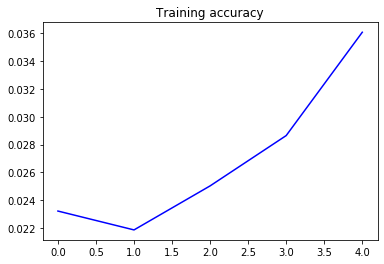

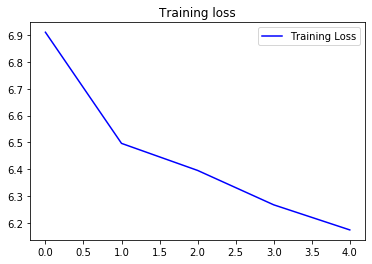

Help me Obi Wan Kenobi, you're my only hope of my love love of love to my love of love to my love of love of my love of love of love i love i my love of in i love my love of love of my love of love of love i love i my love of in i love my love of love of my love of love of love i love i my love of in i love my love of love of my love of love of love i love i my love of in i love my love of love of my love of


In [107]:
  #------------------------------------------------
  # Text prediction
  #------------------------------------------------

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
print(predictors[1],"\n", label[1])
label = ku.to_categorical(label, num_classes=total_words)

#Createa a NN model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

#Fit the model
history = model.fit(predictors, label, epochs=5, verbose=1)

#Accuracy and loss plots
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#Predict new word
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)
